# Otras funciones útiles de Matplot y gráficas 3D

- Matplot tiene muchísimas otras funciones como anotaciones, texto, etiquetas. Veamos algunos ejemplos.
- Para nuestros datos estaremos utilizando los datos de nacimientos en EEUU, provista por el CDC y basado en los ejemplos del libro de Python Data Science Handbook.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

C:\Users\murip\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
births = pd.read_csv('births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

C:\Users\murip\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from ipykernel import kernelapp as app


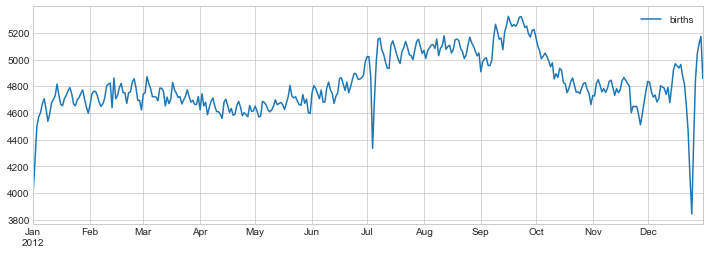

In [3]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

Podemos utilizar anotaciones para marcar eventos importantes en nuestros datos

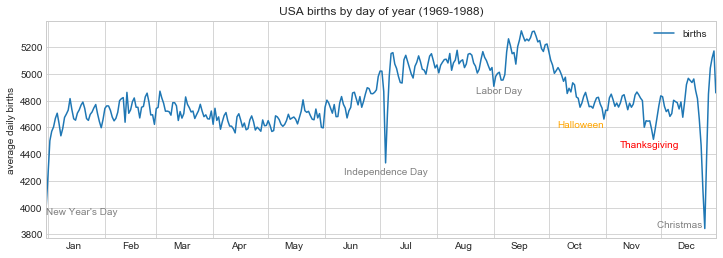

In [4]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', color='orange')
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', color='red')
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

El método ax.text toma una posición X, una posición Y, un string que será nuestra etiqueta, y luego argumentos opcionales con los que podríamos definir el estilo, color, alineación, y otras propiedades del texto. Para explorar estas opciones podemos llamar al Docstring de mpl.text.Text()

In [5]:
mpl.text.Text()

Text(0, 0, '')

- También es posible anotar utilizando los datos actuales como punto de anclaje. Esto se logra por una transformada que convierte nuestros puntos de coordenadas a una representación independiente del tamaño de la gráfica o lo que pasemos como datos
- Podemos utilizar los métodos `ax.transData`, `ax.transAxes`, `fig.transFigure`. Veamos algunos ejemplos.

Text(0.2, 0.2, '. Figure: (0.2, 0.2)')

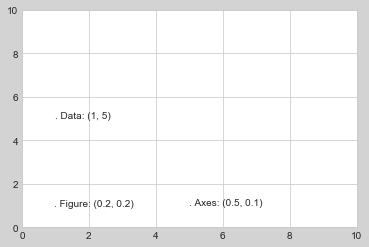

In [6]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData) # transformada asociada con x e y
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes) #transf asociada con ejes, izq-abajo
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure) # transf asociada con la figura, izq-abajo

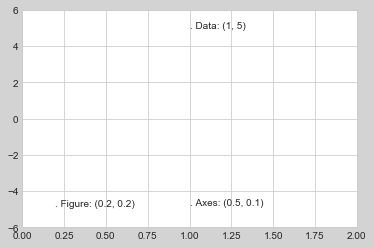

In [7]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

## Anotaciones con flechas
- Podemos utilizar la función de matplotlib `annotate` con diferentes opciones para lograr anotaciones como las siguientes

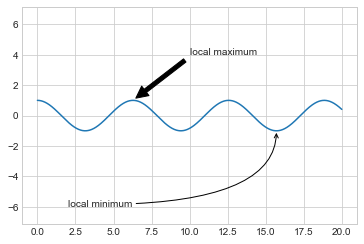

In [8]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

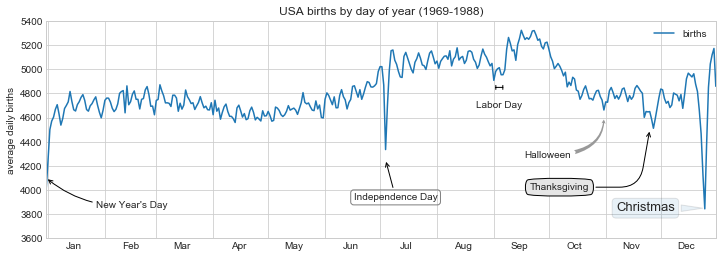

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

# Breve introducción a plotting tridimensional con Matplotlib
- Matplot nos permite gráficas en 3 dimensiones, con funciones limitadas.
- Para hacer uso de esto debemos incluir `mplot3d` de mpl_toolkits e incluyendo `projection='3d'` en la llamada de los `axes`

In [10]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

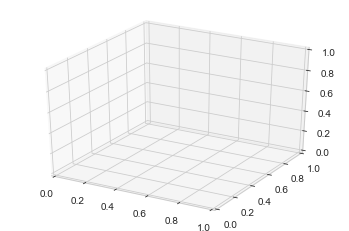

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')

## 3D Plot y 3D Scatter

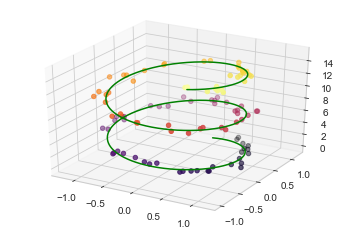

In [19]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'green')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='inferno');

## 3D Contour

In [20]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

C:\Users\murip\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The following kwargs were not used by contour: 'dtype'
  This is separate from the ipykernel package so we can avoid doing imports until


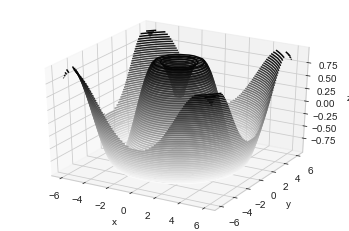

In [22]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary', dtype=object)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

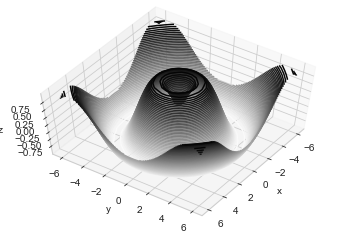

In [33]:
# 60 grados sobre el eje x-y
# 35 grados de azimuth
ax.view_init(60, 35)
fig

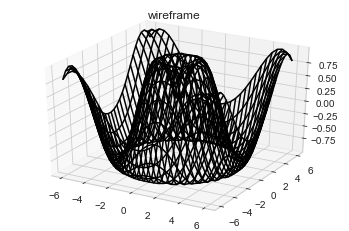

In [34]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');